In [1]:
!wget 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte/bicicletas-publicas/recorridos-realizados-2021.zip'

--2021-06-03 21:14:03--  https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte/bicicletas-publicas/recorridos-realizados-2021.zip
Resolving cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)... 200.16.89.97
Connecting to cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)|200.16.89.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241 [application/zip]
Saving to: ‘recorridos-realizados-2021.zip’

recorridos-realizad 100%[===================>]     241  --.-KB/s    in 0s      

2021-06-03 21:14:04 (23.4 MB/s) - ‘recorridos-realizados-2021.zip’ saved [241/241]



In [2]:
#!unzip 'recorridos-realizados-2021.zip'

In [3]:
!wget 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte/bicicletas-publicas/recorridos-realizados-2020.zip'

--2021-06-03 21:14:04--  https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte/bicicletas-publicas/recorridos-realizados-2020.zip
Resolving cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)... 200.16.89.97
Connecting to cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)|200.16.89.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43990883 (42M) [application/zip]
Saving to: ‘recorridos-realizados-2020.zip’

recorridos-realizad 100%[===================>]  41.95M   425KB/s    in 1m 43s  

2021-06-03 21:15:49 (415 KB/s) - ‘recorridos-realizados-2020.zip’ saved [43990883/43990883]



In [4]:
!wget 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte/estaciones-bicicletas-publicas/nuevas-estaciones-bicicletas-publicas.csv'

--2021-06-03 21:15:49--  https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte/estaciones-bicicletas-publicas/nuevas-estaciones-bicicletas-publicas.csv
Resolving cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)... 200.16.89.97
Connecting to cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)|200.16.89.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39382 (38K) [text/csv]
Saving to: ‘nuevas-estaciones-bicicletas-publicas.csv’

nuevas-estaciones-b 100%[===================>]  38.46K   252KB/s    in 0.2s    

2021-06-03 21:15:50 (252 KB/s) - ‘nuevas-estaciones-bicicletas-publicas.csv’ saved [39382/39382]



In [5]:
# # instalo librerías
!pip install geopandas
!pip install contextily
!pip install mapclassify

     |████████████████████████████████| 1.0MB 9.4MB/s 
     |████████████████████████████████| 15.4MB 269kB/s 
     |████████████████████████████████| 6.6MB 39.6MB/s 
     |████████████████████████████████| 19.3MB 1.1MB/s 


In [6]:
import pandas as pd
import numpy as np
import geopandas as gpd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
recorridos_2020= pd.read_csv('recorridos-realizados-2020.zip', encoding = 'utf-8')

In [9]:
recorridos_2020.head()

duracion_recorrido  id_estacion_origen  ... lat_estacion_destino periodo
0                 882                 116  ...           -34.590541    2020
1                 894                 116  ...           -34.590541    2020
2                1361                 116  ...           -34.590541    2020
3                1010                 116  ...           -34.590541    2020
4                1490                 116  ...           -34.590541    2020

[5 rows x 15 columns]

In [10]:
recorridos_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002945 entries, 0 to 2002944
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   duracion_recorrido          int64  
 1   id_estacion_origen          int64  
 2   fecha_origen_recorrido      object 
 3   nombre_estacion_origen      object 
 4   fecha_destino_recorrido     object 
 5   id_estacion_destino         float64
 6   nombre_estacion_destino     object 
 7   id_usuario                  int64  
 8   direccion_estacion_origen   object 
 9   long_estacion_origen        float64
 10  lat_estacion_origen         float64
 11  direccion_estacion_destino  object 
 12  long_estacion_destino       float64
 13  lat_estacion_destino        float64
 14  periodo                     int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 229.2+ MB


In [11]:
recorridos_2020.shape

(2002945, 15)

In [12]:
#Link con descarga archivo vacio
#recorridos_2021= pd.read_csv('recorridos-realizados-2021.zip', sep=',', encoding='utf-16le',engine='python')

In [13]:
recorridos_2021= pd.read_csv('/content/drive/MyDrive/Técnicas de Analisis de Datos del Transporte/Técnicas de análisis/Técnicas de análisis/Notebooks/Trabajo práctico 1/TP 1  y TP final/TP final/recorridos-realizados-2021.zip', sep=',', encoding='utf-16le',engine='python')

In [14]:
#recorridos_2021.head(2)

In [15]:
recorridos_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144222 entries, 0 to 1144221
Data columns (total 24 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   ID                                  1144222 non-null  int64  
 1   Estado cerrado                      1144222 non-null  object 
 2   Duración                            1144222 non-null  int64  
 3   Id de estación de inicio            1144222 non-null  int64  
 4   Fecha de inicio                     1144222 non-null  object 
 5   Nombre de estación de inicio        1144222 non-null  object 
 6   Fecha de fin                        1144222 non-null  object 
 7   Id de estación de fin de viaje      1144220 non-null  float64
 8   Nombre de estación de fin de viaje  1144220 non-null  object 
 9   ID de ciclista                      1144222 non-null  int64  
 10  Tipo de ciclista                    1144222 non-null  object 
 11  Nombre de c

In [16]:
recorridos_2021.shape

(1144222, 24)

In [17]:
recorridos_2020['cant']=1
recorridos_2021['cant']=1

In [18]:
recorridos_2021 = recorridos_2021.rename({'Id de estación de inicio':'id_estacion_origen','Nombre de estación de inicio':'nombre_estacion_origen','Fecha de inicio':'fecha_origen_recorrido','Fecha de fin':'fecha_destino_recorrido'},axis=1)

In [19]:
recorridos_2021.id_estacion_origen.isna().value_counts()

False    1144222
Name: id_estacion_origen, dtype: int64

In [20]:
cant_estaciones_2021=recorridos_2021.loc[:,['id_estacion_origen','nombre_estacion_origen']].drop_duplicates().reset_index(drop=True)
cant_estaciones_2021.shape

(229, 2)

Como no tengo los datos de la ubicación en el dataset de 2021, tengo que buscarlo en otro dataset y elimino los registros en los que no tengo la ubicación de esa estación

In [21]:
estaciones_bici_2021= pd.read_csv('nuevas-estaciones-bicicletas-publicas.csv', encoding = 'utf-8')

In [22]:
estaciones_bici_2021=estaciones_bici_2021.rename({'nombre':'nombre_estacion_origen'},axis=1)

In [23]:
estaciones_bici_2021.head(2)

WKT  ...  anclajes_t
0  POINT (-58.3747109506359 -34.5924239181221)  ...          20
1    POINT (-58.368256111128 -34.611033074021)  ...          20

[2 rows x 8 columns]

In [24]:
estaciones_bici_2021.tail()

WKT  ...  anclajes_t
224  POINT (-58.4594980806633 -34.5445021121101)  ...          16
225  POINT (-58.3747959781335 -34.6098020140517)  ...          20
226   POINT (-58.370711799739 -34.6089370142298)  ...          24
227  POINT (-58.3788579541696 -34.5824223699167)  ...          24
228  POINT (-58.4632508461667 -34.6290840208419)  ...          24

[5 rows x 8 columns]

In [25]:
recorridos_2021.shape

(1144222, 25)

In [26]:
#elimino las estaciones con na
recorridos_2021=recorridos_2021.merge(estaciones_bici_2021, on='nombre_estacion_origen', how='left')
recorridos_2021_nulos=recorridos_2021.copy()
recorridos_2021=recorridos_2021.loc[~recorridos_2021.WKT.isnull(),:]
recorridos_2021.head(2)

ID  ... anclajes_t
0  10982329  ...       24.0
1  10982317  ...       16.0

[2 rows x 32 columns]

In [27]:
#Estos son todos los registros que no estamos teniendo en cuenta al eliminar las estaciones que no tenemos la ubicacion. Este sería el error que estamos comentiendo que es bastante bajo.
recorridos_2021_nulos.loc[recorridos_2021_nulos.WKT.isnull(),'nombre_estacion_origen'].value_counts()

037- CLAUDIA PÍA BRAUDACCO    2137
354 - José Martí               404
378 - AGRONOMIA                402
105 - 15 DE NOVIEMBRE          172
367 - Eva Perón                150
Name: nombre_estacion_origen, dtype: int64

In [28]:
recorridos_2021['lat_estacion_origen'] = recorridos_2021['WKT'].str.split(' ', expand=True)[2]
recorridos_2021['long_estacion_origen'] = recorridos_2021['WKT'].str.split(' ', expand=True)[1]

In [29]:
recorridos_2021['lat_estacion_origen'] = recorridos_2021['lat_estacion_origen'].str.replace(')','')
recorridos_2021['long_estacion_origen'] = recorridos_2021['long_estacion_origen'].str.replace('(','')

In [30]:
#Los transformo a float para unificar con el del 2020
recorridos_2021['lat_estacion_origen'] = recorridos_2021['lat_estacion_origen'].astype(float)
recorridos_2021['long_estacion_origen'] = recorridos_2021['long_estacion_origen'].astype(float)

In [31]:
recorridos_2021.head(2)

ID Estado cerrado  ...  lat_estacion_origen  long_estacion_origen
0  10982329         NORMAL  ...           -34.565409            -58.459297
1  10982317         NORMAL  ...           -34.606985            -58.448539

[2 rows x 34 columns]

**Análisis**

In [32]:
recorridos_2020.head(3)

duracion_recorrido  id_estacion_origen  ... periodo cant
0                 882                 116  ...    2020    1
1                 894                 116  ...    2020    1
2                1361                 116  ...    2020    1

[3 rows x 16 columns]

In [33]:
recorridos_2020['fecha_origen'] = recorridos_2020['fecha_origen_recorrido'].str.split(' ', expand=True)[0]
recorridos_2020['hora_origen'] = recorridos_2020['fecha_origen_recorrido'].str.split(' ', expand=True)[1]

In [34]:
recorridos_2021['fecha_origen'] = recorridos_2021['fecha_origen_recorrido'].str.split(' ', expand=True)[0]
recorridos_2021['hora_origen'] = recorridos_2021['fecha_origen_recorrido'].str.split(' ', expand=True)[1]

In [35]:
recorridos_2020['fecha_origen_recorrido'] = pd.to_datetime(recorridos_2020['fecha_origen_recorrido'],format='%Y-%m-%d %H:%M:%S')
recorridos_2020['fecha_destino_recorrido'] = pd.to_datetime(recorridos_2020['fecha_destino_recorrido'],format='%Y-%m-%d %H:%M:%S')
recorridos_2020['fecha_origen'] = pd.to_datetime(recorridos_2020['fecha_origen'],format='%Y-%m-%d')
recorridos_2020['hora_origen'] = pd.to_datetime(recorridos_2020['hora_origen'],format='%H:%M:%S')
recorridos_2020['hora_origen'] = pd.to_datetime(recorridos_2020.hora_origen).dt.hour
#recorridos_2020.info()

In [36]:
recorridos_2021['fecha_origen_recorrido'] = pd.to_datetime(recorridos_2021['fecha_origen_recorrido'],format='%Y-%m-%d %H:%M:%S')
recorridos_2021['fecha_destino_recorrido'] = pd.to_datetime(recorridos_2021['fecha_destino_recorrido'],format='%Y-%m-%d %H:%M:%S')
recorridos_2021['fecha_origen'] = pd.to_datetime(recorridos_2021['fecha_origen'],format='%Y-%m-%d')
recorridos_2021['hora_origen'] = pd.to_datetime(recorridos_2021['hora_origen'],format='%H:%M:%S')
recorridos_2021['hora_origen'] = pd.to_datetime(recorridos_2021.hora_origen).dt.hour
#recorridos_2021.info()

Analizamos serie de tiempo para comparar Septiembre 2020 y Abril 2021

In [37]:
serie_tpo_2020=recorridos_2020.groupby(['fecha_origen']).sum().reset_index(drop=False)
serie_tpo_2020=serie_tpo_2020.loc[:,['fecha_origen','cant']]
serie_tpo_2020['mes'] = pd.to_datetime(serie_tpo_2020.fecha_origen).dt.month
serie_tpo_2020.head(2)

fecha_origen  cant  mes
0   2020-01-01  3352    1
1   2020-01-02  5411    1

In [38]:
serie_tpo_2021=recorridos_2021.groupby(['fecha_origen']).sum().reset_index(drop=False)
serie_tpo_2021=serie_tpo_2021.loc[:,['fecha_origen','cant']]
serie_tpo_2021['mes'] = pd.to_datetime(serie_tpo_2021.fecha_origen).dt.month
serie_tpo_2021.head(2)

fecha_origen  cant  mes
0   2021-01-01  5898    1
1   2021-01-02  7458    1

In [39]:
serie_tpo2020y2021=pd.concat([serie_tpo_2020, serie_tpo_2021], ignore_index=True)
serie_tpo2020y2021.head(2)

fecha_origen  cant  mes
0   2020-01-01  3352    1
1   2020-01-02  5411    1

In [40]:
#detectar Septiembre y Abril
septiembre_2020 = serie_tpo2020y2021.loc[serie_tpo2020y2021.mes==9,['fecha_origen','cant']]
septiembre_2020 = septiembre_2020.set_index('fecha_origen')
septiembre_2020['cant'] = serie_tpo2020y2021.cant.max()
#septiembre_2020
abril_2021 = serie_tpo2020y2021.iloc[350:,:].loc[serie_tpo2020y2021.mes==4,['fecha_origen','cant']]
abril_2021 = serie_tpo2020y2021.loc[serie_tpo2020y2021.mes==4,['fecha_origen','cant']]
abril_2021 = abril_2021.set_index('fecha_origen')
abril_2021['cant'] = serie_tpo2020y2021.cant.max()
#abril_2021


In [41]:
#Elimino la columna mes para que se vea mejor el gráfico
serie_tpo2020y2021=serie_tpo2020y2021.loc[:,['fecha_origen','cant']]

In [42]:
#Marco el día del comienzo del pago para que se vea en el gráfico
comienzo_pago=serie_tpo2020y2021.loc[387:387,['fecha_origen']]
comienzo_pago = comienzo_pago.set_index('fecha_origen')
comienzo_pago['cant']=serie_tpo2020y2021.cant.max()
comienzo_pago

cant
fecha_origen       
2021-03-13    14038

In [43]:
serie_tpo2020y2021.groupby('fecha_origen').sum().max()

cant    14038
dtype: int64

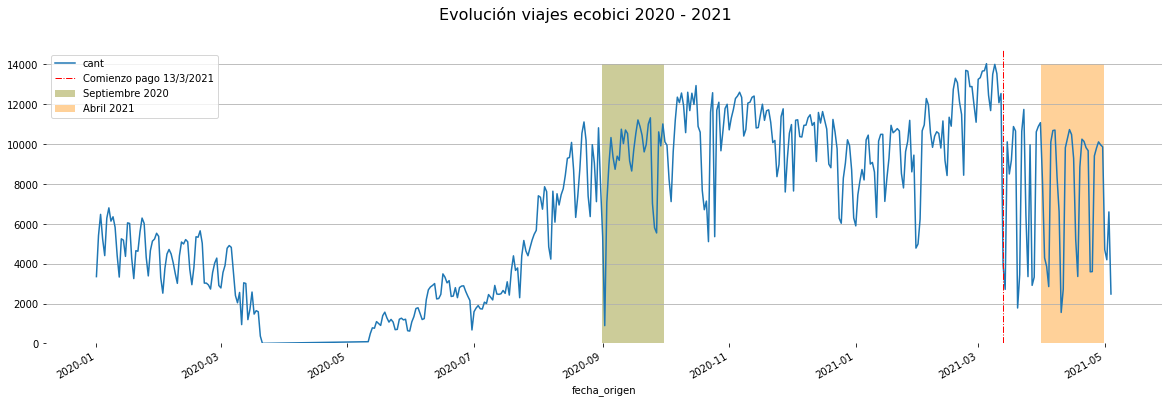

In [44]:
fig,ax = plt.subplots(figsize=(20,6))

fig.suptitle('Evolución viajes ecobici 2020 - 2021', fontsize=16)

serie_tpo2020y2021.groupby('fecha_origen').sum().plot(ax=ax)

ax.bar(septiembre_2020.index,septiembre_2020.cant,color = 'olive', alpha= 0.4,width=1,label = 'Septiembre 2020')
ax.bar(abril_2021.index,abril_2021.cant,color = 'darkorange', alpha= 0.4,width=1,label = 'Abril 2021')
#ax.bar(comienzo_pago.index,comienzo_pago.cant, color='red', alpha= 0.8, width=1,label = 'Comienzo pago 13/3/2021')
ax.axvline(comienzo_pago.index,linestyle='-.', color='red', linewidth=1,label = 'Comienzo pago 13/3/2021')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.grid(axis='y')

plt.savefig("serie_tpo_ecobici.png")
#Se ve que a grandes rasgos los valores generales de Septiembre y Abril son relativamente parecidos, llamando la atención solamente un descenso grande a fin de mes de Septiembre.
#Por lo que sería correcto tomar las semanas que luego tomaremos 14/9/2020 al 18/9/2020 y del 12/4/2020 al 18/4/2020

Analizamos Septiembre 2020 y Abril 2021 por separado

In [45]:
serie_tpo_septiembre_2020 = serie_tpo2020y2021.set_index('fecha_origen')
serie_tpo_septiembre_2020 = serie_tpo_septiembre_2020.loc[datetime(2020,9,1):datetime(2020,9,30)]
serie_tpo_septiembre_2020 = serie_tpo_septiembre_2020.reset_index(drop=False)
#serie_tpo_septiembre_2020.head()

In [46]:
#detectar que dias fueron fines de semana 
tipo_dias_sept=serie_tpo_septiembre_2020.copy()
tipo_dias_sept['tipo_dia'] = tipo_dias_sept.fecha_origen.map(lambda x: x.weekday() > 4)
tipo_dias_sept = tipo_dias_sept.set_index('fecha_origen')
tipo_dias_sept = tipo_dias_sept * tipo_dias_sept.cant.max()
tipo_dias_sept = tipo_dias_sept.tipo_dia
#tipo_dias_sept.head()

In [47]:
serie_tpo_septiembre_2020_index=serie_tpo_septiembre_2020.set_index('fecha_origen')

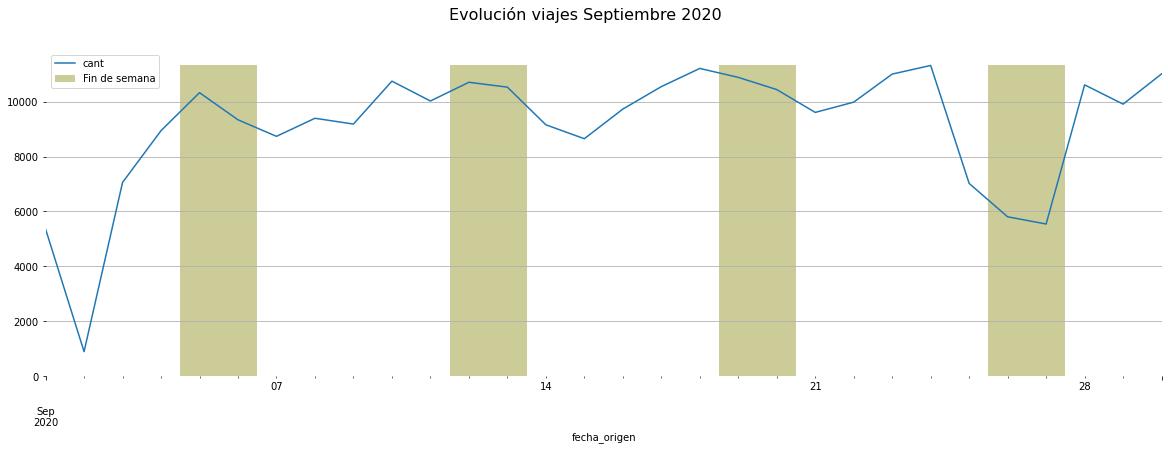

In [48]:
fig,ax = plt.subplots(figsize=(20,6))

fig.suptitle('Evolución viajes Septiembre 2020', fontsize=16)

serie_tpo_septiembre_2020_index.plot(ax=ax)


ax.bar(tipo_dias_sept.index,tipo_dias_sept,color = 'olive', alpha= 0.4,width=1,label = 'Fin de semana')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.grid(axis='y')

plt.savefig("serie_tpo_ecobici_Septiembre2020.png")

In [49]:
serie_tpo_abril_2020 = serie_tpo2020y2021.set_index('fecha_origen')
serie_tpo_abril_2020 = serie_tpo_abril_2020.loc[datetime(2021,4,1):datetime(2021,4,30)]
serie_tpo_abril_2020 = serie_tpo_abril_2020.reset_index(drop=False)
#serie_tpo_abril_2020.head()

In [50]:
#detectar que dias fueron fines de semana 
tipo_dias_abril=serie_tpo_abril_2020.copy()
tipo_dias_abril['tipo_dia'] = tipo_dias_abril.fecha_origen.map(lambda x: x.weekday() > 4)
tipo_dias_abril = tipo_dias_abril.set_index('fecha_origen')
tipo_dias_abril = tipo_dias_abril * tipo_dias_abril.cant.max()
tipo_dias_abril = tipo_dias_abril.tipo_dia
#tipo_dias_abril.head()

In [51]:
serie_tpo_abril_2020_index=serie_tpo_abril_2020.set_index('fecha_origen')

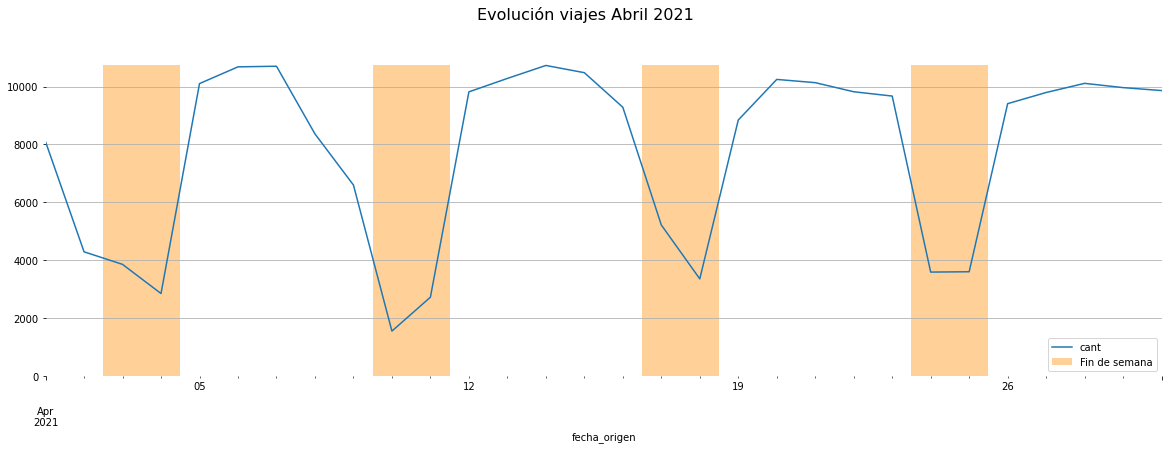

In [52]:
fig,ax = plt.subplots(figsize=(20,6))

fig.suptitle('Evolución viajes Abril 2021', fontsize=16)

serie_tpo_abril_2020_index.plot(ax=ax)


ax.bar(tipo_dias_abril.index,tipo_dias_abril,color = 'darkorange', alpha= 0.4,width=1,label = 'Fin de semana')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.grid(axis='y')

plt.savefig("serie_tpo_ecobici_Abril_2021.png")

Ahora vamos a filtrar por las semanas que queremos para realizar el análisis

In [53]:
df_2020_indice = recorridos_2020.set_index('fecha_origen').sort_values(by='fecha_origen', ascending=True)
df_2020_indice.head(5)

duracion_recorrido  id_estacion_origen  ... cant hora_origen
fecha_origen                                          ...                 
2020-01-01                  1326                 204  ...    1           1
2020-01-01                  2666                  44  ...    1          18
2020-01-01                 11585                 252  ...    1          18
2020-01-01                  5295                   6  ...    1          17
2020-01-01                  7364                 214  ...    1          14

[5 rows x 17 columns]

In [54]:
#df_2020_indice.info()

In [55]:
df_2021_indice = recorridos_2021.set_index('fecha_origen').sort_values(by='fecha_origen', ascending=True)
df_2021_indice.head(2)

ID Estado cerrado  ...  long_estacion_origen  hora_origen
fecha_origen                          ...                                   
2021-01-01    9646392         NORMAL  ...            -58.363926            0
2021-01-01    9650853         NORMAL  ...            -58.442684           18

[2 rows x 35 columns]

In [56]:
recorridos_2020_filt = df_2020_indice.loc[datetime(2020,9,14):datetime(2020,9,20)]
recorridos_2020_filt.head(2)

duracion_recorrido  id_estacion_origen  ... cant hora_origen
fecha_origen                                          ...                 
2020-09-14                  1205                 121  ...    1          14
2020-09-14                   412                 163  ...    1          12

[2 rows x 17 columns]

In [57]:
recorridos_2020_filt.shape

(70632, 17)

In [58]:
recorridos_2020_filt=recorridos_2020_filt.reset_index(drop=False)

In [59]:
recorridos_2020_filt.head(2)

fecha_origen  duracion_recorrido  ...  cant hora_origen
0   2020-09-14                1205  ...     1          14
1   2020-09-14                 412  ...     1          12

[2 rows x 18 columns]

In [60]:
recorridos_2021_filt = df_2021_indice.loc[datetime(2021,4,12):datetime(2021,4,18)]
recorridos_2021_filt.head(2)

ID Estado cerrado  ...  long_estacion_origen  hora_origen
fecha_origen                           ...                                   
2021-04-12    10770247         NORMAL  ...            -58.422609           17
2021-04-12    10770248         NORMAL  ...            -58.397599           17

[2 rows x 35 columns]

In [61]:
recorridos_2021_filt.shape

(59177, 35)

In [62]:
recorridos_2021_filt=recorridos_2021_filt.reset_index(drop=False)

In [63]:
recorridos_2021_filt.tail(2)

fecha_origen        ID  ... long_estacion_origen  hora_origen
59175   2021-04-18  10830729  ...           -58.407467           13
59176   2021-04-18  10830730  ...           -58.451529           13

[2 rows x 36 columns]

In [64]:
recorridos_2020_filt.head(2)

fecha_origen  duracion_recorrido  ...  cant hora_origen
0   2020-09-14                1205  ...     1          14
1   2020-09-14                 412  ...     1          12

[2 rows x 18 columns]

In [65]:
recorridos_2020_filt['dia_semana_origen'] = recorridos_2020_filt['fecha_origen']
recorridos_2020_filt['dia_semana_origen'] = pd.to_datetime(recorridos_2020_filt.dia_semana_origen).dt.weekday

In [66]:
recorridos_2020_filt['dia_semana_origen_1']=recorridos_2020_filt['dia_semana_origen'].replace({0:'lunes', 
                   1:'martes', 
                   2:'miercoles', 
                   3:'jueves', 
                   4:'viernes', 
                   5:'sabado', 
                   6:'domingo'})

In [67]:
recorridos_2020_filt['dia_semana_origen_1'].value_counts()

viernes      11213
sabado       10887
jueves       10549
domingo      10442
miercoles     9731
lunes         9159
martes        8651
Name: dia_semana_origen_1, dtype: int64

In [68]:
#sumandole la columna 'cant' no terminamos de solucionar el tema. Entonces realizamos todas estas transformaciones para llegar a ordenarlo por día
recorridos_2020_filt_grafico=recorridos_2020_filt.groupby(['dia_semana_origen_1']).sum().sort_values('dia_semana_origen',ascending=True).reset_index(drop=False)
recorridos_2020_filt_grafico=recorridos_2020_filt_grafico.loc[:,['dia_semana_origen_1','cant']]
recorridos_2020_filt_grafico['orden']=recorridos_2020_filt_grafico['dia_semana_origen_1'].replace({'lunes':0, 
                   'martes':1, 
                   'miercoles':2, 
                   'jueves':3, 
                   'viernes':4, 
                   'sabado':5, 
                   'domingo':6})
recorridos_2020_filt_grafico=recorridos_2020_filt_grafico.sort_values(by='orden', ascending=True)
recorridos_2020_filt_grafico=recorridos_2020_filt_grafico.loc[:,['dia_semana_origen_1','cant']].set_index('dia_semana_origen_1')
recorridos_2020_filt_grafico

cant
dia_semana_origen_1       
lunes                 9159
martes                8651
miercoles             9731
jueves               10549
viernes              11213
sabado               10887
domingo              10442

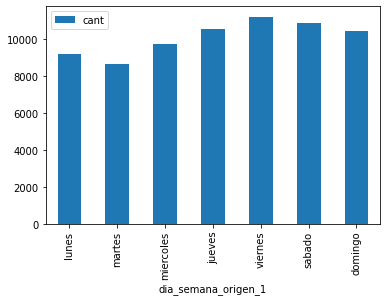

In [69]:
recorridos_2020_filt_grafico.plot(kind='bar')

In [70]:
recorridos_2021_filt['dia_semana_origen'] = recorridos_2021_filt['fecha_origen']
recorridos_2021_filt['dia_semana_origen'] = pd.to_datetime(recorridos_2021_filt.dia_semana_origen).dt.weekday

In [71]:
recorridos_2021_filt['dia_semana_origen_1']=recorridos_2021_filt['dia_semana_origen'].replace({0:'lunes', 
                   1:'martes', 
                   2:'miercoles', 
                   3:'jueves', 
                   4:'viernes', 
                   5:'sabado', 
                   6:'domingo'})

In [72]:
recorridos_2021_filt['dia_semana_origen_1'].value_counts()

miercoles    10730
jueves       10481
martes       10282
lunes         9818
viernes       9287
sabado        5221
domingo       3358
Name: dia_semana_origen_1, dtype: int64

In [73]:
recorridos_2021_filt.head(2)

fecha_origen        ID  ... dia_semana_origen  dia_semana_origen_1
0   2021-04-12  10770247  ...                 0                lunes
1   2021-04-12  10770248  ...                 0                lunes

[2 rows x 38 columns]

In [74]:
#sumandole la columna 'cant' no terminamos de solucionar el tema. Entonces realizamos todas estas transformaciones para llegar a ordenarlo por día
recorridos_2021_filt_grafico=recorridos_2021_filt.groupby(['dia_semana_origen_1']).sum().sort_values('dia_semana_origen',ascending=True).reset_index(drop=False)
recorridos_2021_filt_grafico=recorridos_2021_filt_grafico.loc[:,['dia_semana_origen_1','cant']]
recorridos_2021_filt_grafico['orden']=recorridos_2021_filt_grafico['dia_semana_origen_1'].replace({'lunes':0, 
                   'martes':1, 
                   'miercoles':2, 
                   'jueves':3, 
                   'viernes':4, 
                   'sabado':5, 
                   'domingo':6})
recorridos_2021_filt_grafico=recorridos_2021_filt_grafico.sort_values(by='orden', ascending=True)
recorridos_2021_filt_grafico=recorridos_2021_filt_grafico.loc[:,['dia_semana_origen_1','cant']].set_index('dia_semana_origen_1')
recorridos_2021_filt_grafico

cant
dia_semana_origen_1       
lunes                 9818
martes               10282
miercoles            10730
jueves               10481
viernes               9287
sabado                5221
domingo               3358

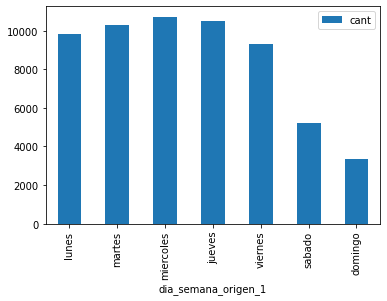

In [75]:
recorridos_2021_filt_grafico.plot(kind='bar')

In [76]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [77]:
def demanda_por_hora(recorridos_2020_filt, xtick_option, annotate):

  hora_linea = pd.crosstab(index=recorridos_2020_filt.hora_origen,
                           columns=recorridos_2020_filt.dia_semana_origen_1,
                           margins=False)

  if annotate:
    leg_val = False
  else:
    leg_val = True
  
  fig,ax = plt.subplots(figsize=(17,6))
  hora_linea.plot(ax=ax, legend=leg_val)
  
  ax.grid()

  ax.set_xlabel('Hora del día')
  ax.set_ylabel('Viajes por hora')

  ax.set_title('Cantidad de viajes por hora por día (semana del 14-9-2020 al 20-9-2020)')
  if xtick_option==1:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  else:
    etiquetas_eje_x = hora_linea.index.unique()
    ax.set_xticks(etiquetas_eje_x)
  
  if annotate:
    for estacion in hora_linea.columns:  
      max_pasajeros = hora_linea[estacion].max()
      max_hora = hora_linea[estacion].idxmax()
      
      ax.annotate(estacion, 
                  xy=(max_hora, max_pasajeros),
                  bbox=dict(boxstyle="round", fc="none", ec="gray"), 
                  xytext=(max_hora+0.25, max_pasajeros+0.5),
                  arrowprops=dict(arrowstyle="fancy",
                              fc="0.6", ec="none",
                              connectionstyle="angle3,angleA=0,angleB=-90"));  

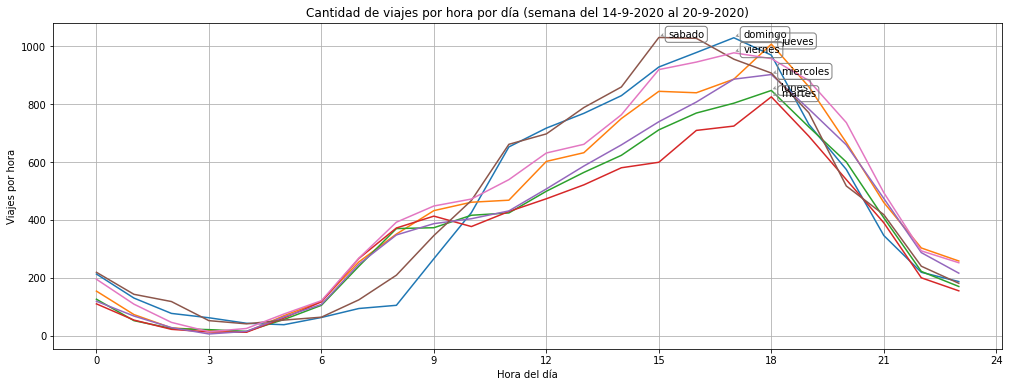

In [78]:
demanda_por_hora(recorridos_2020_filt, xtick_option=1, annotate=True)
plt.savefig("image_grafico_viajes_hora_septiembre.png")

(0.0, 11213.0)

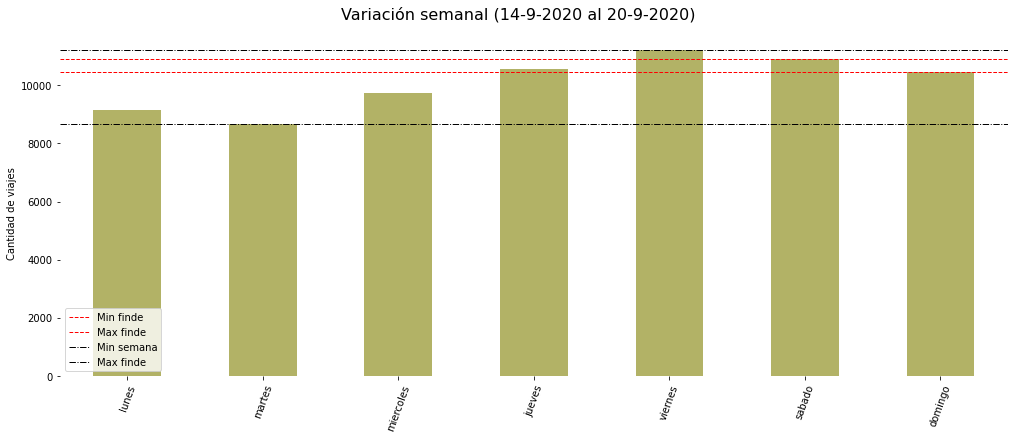

In [79]:
#Grafico Barras Septiembre 2020

max_trx = recorridos_2020_filt_grafico.cant.max()   
    #genero los ejes
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(17,6))
    #creo el bar plot

fig.suptitle('Variación semanal (14-9-2020 al 20-9-2020)', fontsize=16)

recorridos_2020_filt_grafico.plot(ax=ax1,kind='bar',color='olive',alpha=0.6)

# Agregamos unos datos estadísticos de referencia para el plot de densidad y su respectiva leyenda
min_valor_finde = ax1.axhline(10442, linestyle='--', color='red', linewidth=1)
max_valor_finde = ax1.axhline(10887,linestyle='--', color='red', linewidth=1)
min_valor_semana = ax1.axhline(8651,linestyle='-.', color='black', linewidth=1)
max_valor_semana = ax1.axhline(11213,linestyle='-.', color='black', linewidth=1)
ax1.legend((min_valor_finde,max_valor_finde,min_valor_semana,max_valor_semana),('Min finde','Max finde','Min semana','Max finde'))

    # Eliminamos los bordes que no consideramos necesarios
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
    #agrego etiquetas para eje x
for tick in ax1.get_xticklabels():
    tick.set_rotation(70)

# for i in range(len(countries)):
#   plt.annotate(totalDeaths[i], (-0.1 + i, totalDeaths[i] + j))

    #equiparo la proporcion
ax1.set_xlabel('')
ax1.set_ylabel('Cantidad de viajes')
ax1.set_ylim(0,max_trx)

#fig

In [80]:
def demanda_por_hora(recorridos_2021_filt, xtick_option, annotate):

  hora_linea = pd.crosstab(index=recorridos_2021_filt.hora_origen,
                           columns=recorridos_2021_filt.dia_semana_origen_1,
                           margins=False)

  if annotate:
    leg_val = False
  else:
    leg_val = True
  
  fig,ax = plt.subplots(figsize=(17,6))
  hora_linea.plot(ax=ax, legend=leg_val)
  
  ax.grid()

  ax.set_xlabel('Hora del día')
  ax.set_ylabel('Viajes por hora')

  ax.set_title('Cantidad de viajes por hora por día (semana del 12-4-2020 al 18-4-2020)')
  if xtick_option==1:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  else:
    etiquetas_eje_x = hora_linea.index.unique()
    ax.set_xticks(etiquetas_eje_x)
  
  if annotate:
    for estacion in hora_linea.columns:  
      max_pasajeros = hora_linea[estacion].max()
      max_hora = hora_linea[estacion].idxmax()
      
      ax.annotate(estacion, 
                  xy=(max_hora, max_pasajeros),
                  bbox=dict(boxstyle="round", fc="none", ec="gray"), 
                  xytext=(max_hora+0.25, max_pasajeros+0.5),
                  arrowprops=dict(arrowstyle="fancy",
                              fc="0.6", ec="none",
                              connectionstyle="angle3,angleA=0,angleB=-90"));  

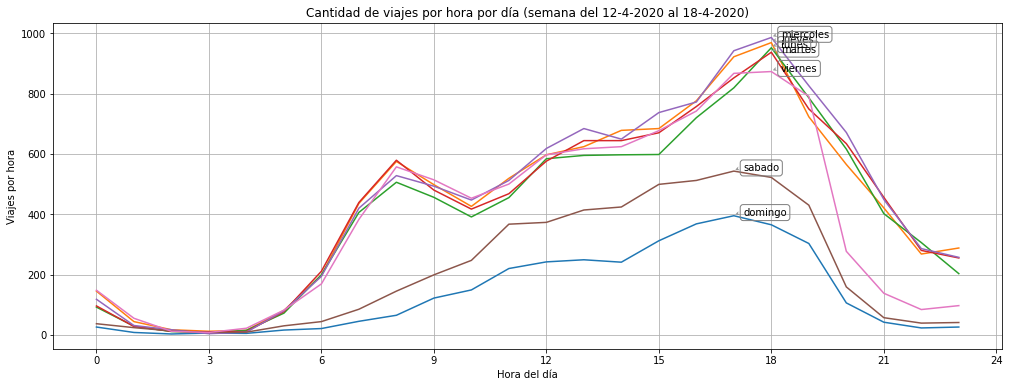

In [81]:
demanda_por_hora(recorridos_2021_filt, xtick_option=1, annotate=True)
plt.savefig("image_grafico_viajes_hora_abril.png")

In [82]:
recorridos_2021_filt_grafico.cant.max()

10730

(0.0, 10730.0)

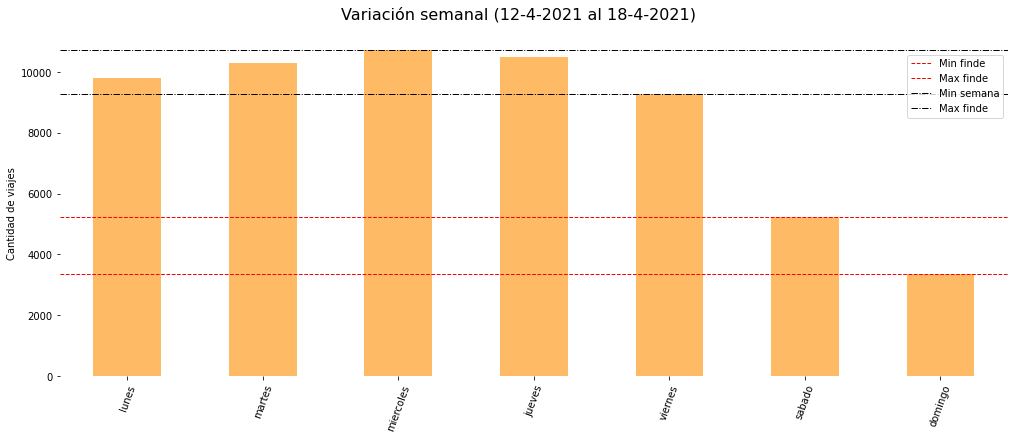

In [83]:
#Grafico Barras Abril 2020

max_trx = recorridos_2021_filt_grafico.cant.max()    
#max_trx = recorridos_2021_filt['dia_semana_origen_1'].value_counts().max()     

    #genero los ejes
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(17,6))
    

    #creo el bar plot

fig.suptitle('Variación semanal (12-4-2021 al 18-4-2021)', fontsize=16)
recorridos_2021_filt_grafico.plot(ax=ax1,kind='bar',color='darkorange',alpha=0.6)
#recorridos_2021_filt['dia_semana_origen_1'].value_counts().plot(kind='bar',color='darkorange',alpha=0.6)


# Agregamos unos datos estadísticos de referencia para el plot de densidad y su respectiva leyenda
min_valor_finde = ax1.axhline(3358, linestyle='--', color='red', linewidth=1)
max_valor_finde = ax1.axhline(5221,linestyle='--', color='red', linewidth=1)
min_valor_semana = ax1.axhline(9287,linestyle='-.', color='black', linewidth=1)
max_valor_semana = ax1.axhline(10730,linestyle='-.', color='black', linewidth=1)
ax1.legend((min_valor_finde,max_valor_finde,min_valor_semana,max_valor_semana),('Min finde','Max finde','Min semana','Max finde'))

    # Eliminamos los bordes que no consideramos necesarios
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
    #agrego etiquetas para eje x
for tick in ax1.get_xticklabels():
    tick.set_rotation(70)
    
    #equiparo la proporcion
ax1.set_xlabel('')
ax1.set_ylabel('Cantidad de viajes')
ax1.set_ylim(0,max_trx)

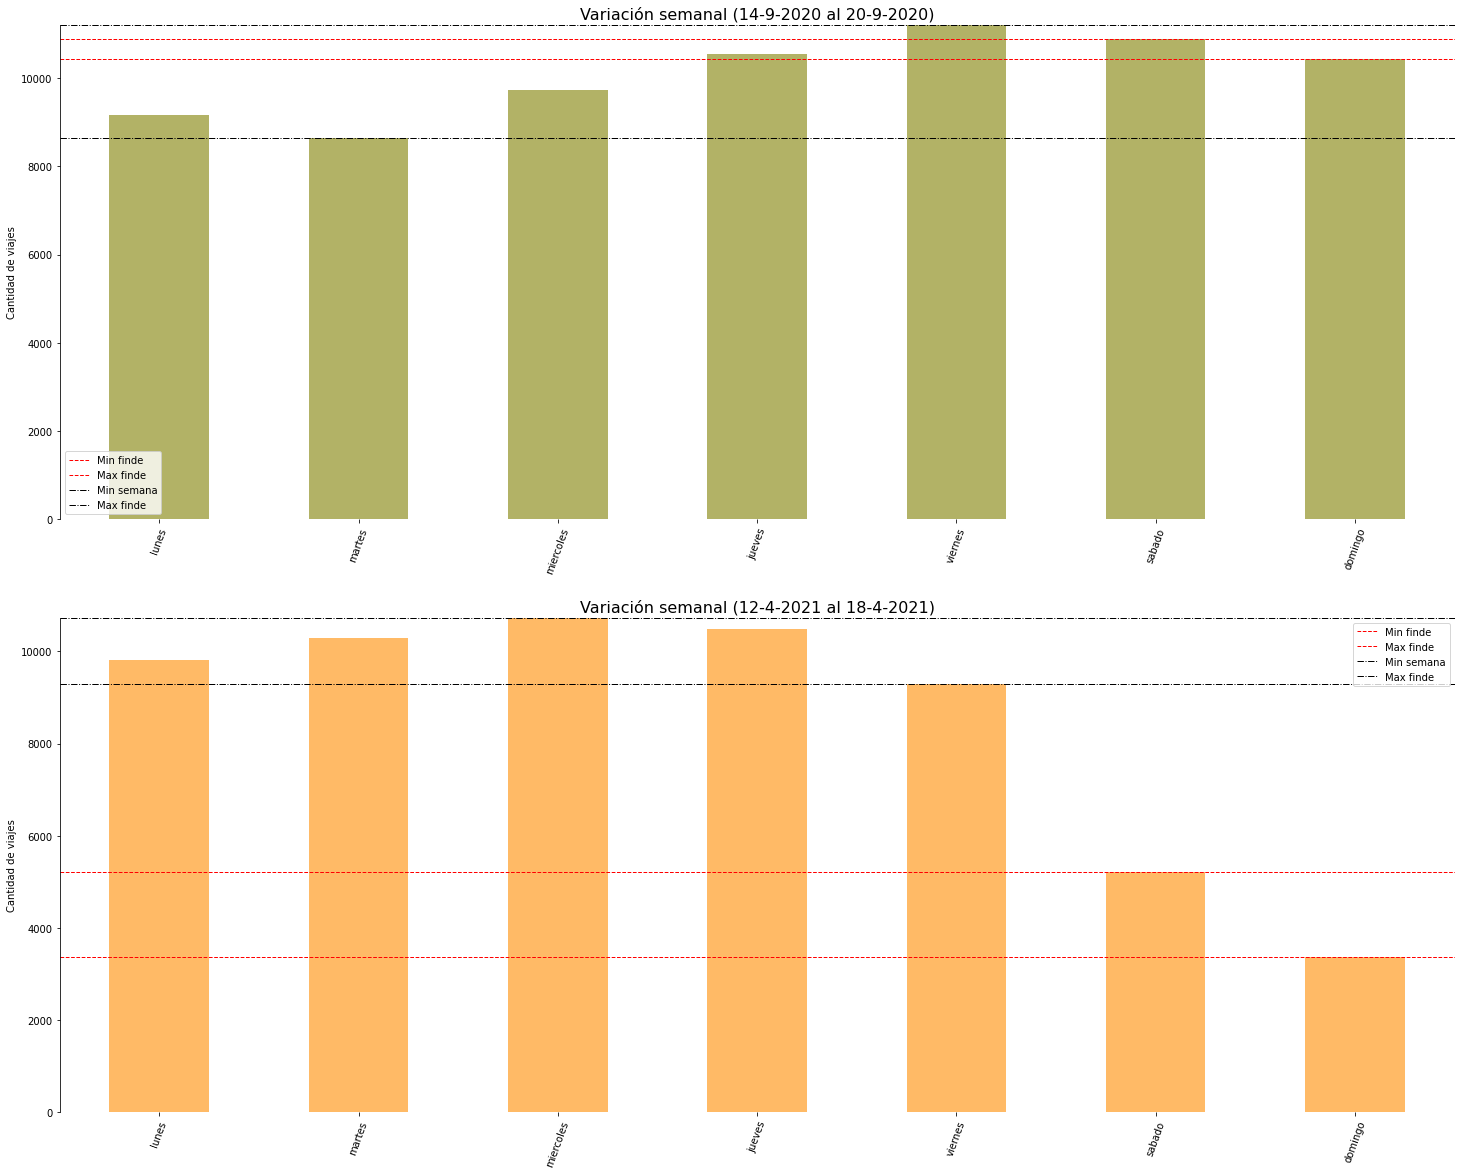

In [84]:
# en dos filas y dos columnas, con mas posiciones
fig = plt.figure(figsize=(25,20))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


#Grafico Barras Septiembre 2020
max_trx_1 = recorridos_2020_filt_grafico.cant.max()   
    #creo el bar plot
ax1.set_title('Variación semanal (14-9-2020 al 20-9-2020)', fontsize=16)

recorridos_2020_filt_grafico.plot(ax=ax1,kind='bar',color='olive',alpha=0.6)

# Agregamos unos datos estadísticos de referencia para el plot de densidad y su respectiva leyenda
min_valor_finde = ax1.axhline(10442, linestyle='--', color='red', linewidth=1)
max_valor_finde = ax1.axhline(10887,linestyle='--', color='red', linewidth=1)
min_valor_semana = ax1.axhline(8651,linestyle='-.', color='black', linewidth=1)
max_valor_semana = ax1.axhline(11213,linestyle='-.', color='black', linewidth=1)
ax1.legend((min_valor_finde,max_valor_finde,min_valor_semana,max_valor_semana),('Min finde','Max finde','Min semana','Max finde'))

    # Eliminamos los bordes que no consideramos necesarios
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

    #agrego etiquetas para eje x
for tick in ax1.get_xticklabels():
    tick.set_rotation(70)


    #equiparo la proporcion
ax1.set_xlabel('')
ax1.set_ylabel('Cantidad de viajes')
ax1.set_ylim(0,max_trx_1)





#Grafico Barras Abril 2020
max_trx_2 = recorridos_2021_filt_grafico.cant.max()    
    #creo el bar plot
ax2.set_title('Variación semanal (12-4-2021 al 18-4-2021)', fontsize=16)

recorridos_2021_filt_grafico.plot(ax=ax2,kind='bar',color='darkorange',alpha=0.6)

# Agregamos unos datos estadísticos de referencia para el plot de densidad y su respectiva leyenda
min_valor_finde = ax2.axhline(3358, linestyle='--', color='red', linewidth=1)
max_valor_finde = ax2.axhline(5221,linestyle='--', color='red', linewidth=1)
min_valor_semana = ax2.axhline(9287,linestyle='-.', color='black', linewidth=1)
max_valor_semana = ax2.axhline(10730,linestyle='-.', color='black', linewidth=1)
ax2.legend((min_valor_finde,max_valor_finde,min_valor_semana,max_valor_semana),('Min finde','Max finde','Min semana','Max finde'))

    # Eliminamos los bordes que no consideramos necesarios
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
    #agrego etiquetas para eje x
for tick in ax2.get_xticklabels():
    tick.set_rotation(70)
    
    #equiparo la proporcion
ax2.set_xlabel('')
ax2.set_ylabel('Cantidad de viajes')
ax2.set_ylim(0,max_trx_2)

plt.savefig("image_grafico_barras.png")

**Mapas**

In [85]:
from shapely.geometry import Point

In [86]:
list(zip(recorridos_2020_filt['long_estacion_origen'], recorridos_2020_filt['lat_estacion_origen']))

[(-58.4285074809885, -34.601173754739),
 (-58.4064281102522, -34.6095671542232),
 (-58.402650304279206, -34.6170206427367),
 (-58.43468655592589, -34.5752772343024),
 (-58.435185404908296, -34.5931413389044),
 (-58.40773819299721, -34.585443297790604),
 (-58.380561277306604, -34.6176551651145),
 (-58.4345384582746, -34.6043905985334),
 (-58.40616236530929, -34.590863029021804),
 (-58.401921116065594, -34.6089858629996),
 (-58.416011505223395, -34.6222611969432),
 (-58.3639255346178, -34.611891114700796),
 (-58.3747109506359, -34.5924239181221),
 (-58.423394953418104, -34.6134498597511),
 (-58.4508957761728, -34.5525703378785),
 (-58.3989776069524, -34.5970915061267),
 (-58.382545991205596, -34.5938635127407),
 (-58.4053360222206, -34.631645763386196),
 (-58.3866898229969, -34.6018642749649),
 (-58.4405827974639, -34.616151837130104),
 (-58.43487344289311, -34.600275503064196),
 (-58.401921116065594, -34.6089858629996),
 (-58.36428423938379, -34.6384803199403),
 (-58.40616236530929, -34

In [87]:
def point_from_coord(df, x, y, crs):
  '''
  Carga un geodataframe de puntos a partir de un par de coordenadas lat/lon
  '''
  df['coordenadas'] = list(zip(df[x], df[y]))
  df['geometry'] = df['coordenadas'].map(Point)
  df_sin_coord = df.drop(columns=['coordenadas',x,y])
  gdf = gpd.GeoDataFrame(df_sin_coord, geometry='geometry', crs=crs) 

  return gdf

In [88]:
# creamos el gdf de estaciones
gdf_2020 = point_from_coord(recorridos_2020_filt, 'long_estacion_origen', 'lat_estacion_origen', 4326)

In [89]:
#Ahora con 2021
list(zip(recorridos_2021_filt['long_estacion_origen'], recorridos_2021_filt['lat_estacion_origen']))

[(-58.4226091321391, -34.629053919652),
 (-58.3975989943363, -34.6174492772101),
 (-58.4458959421918, -34.6051095592246),
 (-58.4259969848864, -34.5885672796636),
 (-58.4187284062523, -34.6064108220505),
 (-58.4207045947455, -34.5652027732943),
 (-58.427816250575, -34.6149488722851),
 (-58.4350546710935, -34.6310192034927),
 (-58.4077381929972, -34.5854432977906),
 (-58.4285074809885, -34.6011737547389),
 (-58.4259969848864, -34.5885672796636),
 (-58.4583145279611, -34.6137786959411),
 (-58.431492640704, -34.6198459659871),
 (-58.4119623359704, -34.5805381653637),
 (-58.4508957761728, -34.5525703378785),
 (-58.4167773315577, -34.6122311916337),
 (-58.3745377410695, -34.5921062117227),
 (-58.4016779936729, -34.6212692444383),
 (-58.412558393615, -34.6409632407722),
 (-58.4934201525439, -34.6061190485399),
 (-58.3955111981761, -34.6023210423103),
 (-58.3893329884138, -34.6094227344644),
 (-58.3813604943936, -34.6153277081039),
 (-58.3642842393838, -34.6384803199403),
 (-58.4348734428931,

In [90]:
#Ahora con 2021
gdf_2021 = point_from_coord(recorridos_2021_filt, 'long_estacion_origen', 'lat_estacion_origen', 4326)

In [91]:
gdf_2020=gdf_2020.to_crs('EPSG:3857')
gdf_2021=gdf_2021.to_crs('EPSG:3857')

In [92]:
gdf_2020.crs.is_projected

True

In [93]:
gdf_2021.crs.is_projected

True

In [94]:
gdf_2020.head(2)

fecha_origen  ...                           geometry
0   2020-09-14  ...  POINT (-6504231.701 -4109813.471)
1   2020-09-14  ...  POINT (-6501773.836 -4110948.653)

[2 rows x 19 columns]

In [95]:
gdf_2021.head(2)

fecha_origen        ID  ... dia_semana_origen_1                           geometry
0   2021-04-12  10770247  ...               lunes  POINT (-6503575.099 -4113584.621)
1   2021-04-12  10770248  ...               lunes  POINT (-6500790.984 -4112014.791)

[2 rows x 37 columns]

In [96]:
len(gdf_2020.nombre_estacion_origen.unique())

193

In [97]:
len(gdf_2021.nombre_estacion_origen.unique())

223

In [98]:
type(gdf_2020)

geopandas.geodataframe.GeoDataFrame

In [99]:
type(gdf_2021)

geopandas.geodataframe.GeoDataFrame

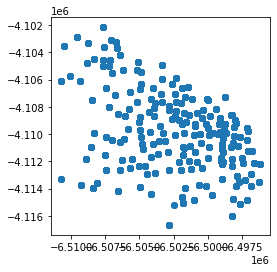

In [100]:
gdf_2020.plot();

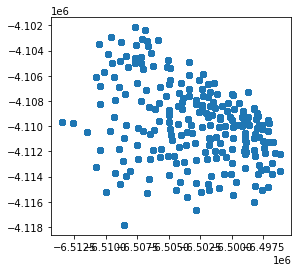

In [101]:
gdf_2021.plot();

In [102]:
estaciones_bici=gdf_2020.loc[:,['id_estacion_origen','nombre_estacion_origen','geometry']].drop_duplicates().reset_index(drop=True)
estaciones_bici.head(2)

id_estacion_origen nombre_estacion_origen                           geometry
0                 121            121 - YATAY  POINT (-6504231.701 -4109813.471)
1                 163          163 - ONCE II  POINT (-6501773.836 -4110948.653)

In [103]:
#Ahora con 2021
estaciones_bici_=gdf_2021.loc[:,['id_estacion_origen','nombre_estacion_origen','geometry']].drop_duplicates().reset_index(drop=True)
estaciones_bici_.head(2)

id_estacion_origen nombre_estacion_origen                           geometry
0                  49    049 - 33 Orientales  POINT (-6503575.099 -4113584.621)
1                  91            091 - Pasco  POINT (-6500790.984 -4112014.791)

In [104]:
gdf_2020.dia_semana_origen_1.unique()

array(['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado',
       'domingo'], dtype=object)

In [105]:
gdf_2021.dia_semana_origen_1.unique()

array(['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado',
       'domingo'], dtype=object)

In [106]:
dias_semana=['lunes','martes','miercoles','jueves','viernes']
finde=['sabado','domingo']

In [107]:
gdf_2020_dias_semana=gdf_2020[gdf_2020.dia_semana_origen_1.isin(dias_semana)]
gdf_2020_finde=gdf_2020[gdf_2020.dia_semana_origen_1.isin(finde)]

In [108]:
gdf_2021_dias_semana=gdf_2021[gdf_2021.dia_semana_origen_1.isin(dias_semana)]
gdf_2021_finde=gdf_2021[gdf_2021.dia_semana_origen_1.isin(finde)]

In [109]:
gdf_2020_dias_semana.dia_semana_origen_1.unique()

array(['lunes', 'martes', 'miercoles', 'jueves', 'viernes'], dtype=object)

In [110]:
gdf_2021_dias_semana.dia_semana_origen_1.unique()

array(['lunes', 'martes', 'miercoles', 'jueves', 'viernes'], dtype=object)

In [111]:
gdf_2020_finde.dia_semana_origen_1.unique()

array(['sabado', 'domingo'], dtype=object)

In [112]:
gdf_2021_finde.dia_semana_origen_1.unique()

array(['sabado', 'domingo'], dtype=object)

In [113]:
gdf_2020_dias_semana.head(2)

fecha_origen  ...                           geometry
0   2020-09-14  ...  POINT (-6504231.701 -4109813.471)
1   2020-09-14  ...  POINT (-6501773.836 -4110948.653)

[2 rows x 19 columns]

In [114]:
gdf_2021_dias_semana.head(2)

fecha_origen        ID  ... dia_semana_origen_1                           geometry
0   2021-04-12  10770247  ...               lunes  POINT (-6503575.099 -4113584.621)
1   2021-04-12  10770248  ...               lunes  POINT (-6500790.984 -4112014.791)

[2 rows x 37 columns]

In [115]:
gdf_2020_dias_semana_group_estacion = gdf_2020_dias_semana.groupby(['id_estacion_origen','nombre_estacion_origen']).sum().sort_values('cant',ascending=False).reset_index(drop=False)
gdf_2020_dias_semana_group_estacion=gdf_2020_dias_semana_group_estacion.loc[:,['id_estacion_origen','nombre_estacion_origen','cant']]
gdf_2020_dias_semana_group_estacion.head()

id_estacion_origen         nombre_estacion_origen  cant
0                 277            292 - PLAZA BOLIVIA   913
1                  29        029 - Parque Centenario   797
2                 222  160 - Godoy Cruz y Libertador   759
3                  14                 014 - Pacifico   728
4                 289    255 - BARRANCAS DE BELGRANO   666

In [116]:
gdf_2020_dias_semana_group_estacion_merge =  estaciones_bici.merge(gdf_2020_dias_semana_group_estacion, on='id_estacion_origen', how='right')
gdf_2020_dias_semana_group_estacion_merge = gdf_2020_dias_semana_group_estacion_merge.rename({'nombre_estacion_origen_x':'nombre_estacion_origen'},axis=1)
gdf_2020_dias_semana_group_estacion_merge.head()

id_estacion_origen  ... cant
0                 277  ...  913
1                  29  ...  797
2                 222  ...  759
3                  14  ...  728
4                 289  ...  666

[5 rows x 5 columns]

In [117]:
gdf_2020_finde_group_estacion = gdf_2020_finde.groupby(['id_estacion_origen','nombre_estacion_origen']).sum().sort_values('cant',ascending=False).reset_index(drop=False)
gdf_2020_finde_group_estacion=gdf_2020_finde_group_estacion.loc[:,['id_estacion_origen','nombre_estacion_origen','cant']]
gdf_2020_finde_group_estacion.head()

id_estacion_origen            nombre_estacion_origen  cant
0                 222     160 - Godoy Cruz y Libertador   558
1                 277               292 - PLAZA BOLIVIA   533
2                 210             335 - General Urquiza   516
3                 239  391 - Plaza República de Ecuador   441
4                 202         001 - FACULTAD DE DERECHO   381

In [118]:
gdf_2020_finde_group_estacion_merge =  estaciones_bici.merge(gdf_2020_finde_group_estacion, on='id_estacion_origen', how='right')
gdf_2020_finde_group_estacion_merge = gdf_2020_finde_group_estacion_merge.rename({'nombre_estacion_origen_x':'nombre_estacion_origen'},axis=1)
gdf_2020_finde_group_estacion_merge.head()

id_estacion_origen  ... cant
0                 222  ...  558
1                 277  ...  533
2                 210  ...  516
3                 239  ...  441
4                 202  ...  381

[5 rows x 5 columns]

In [119]:
#Ahora con 2021
gdf_2021_dias_semana_group_estacion = gdf_2021_dias_semana.groupby(['id_estacion_origen','nombre_estacion_origen']).sum().sort_values('cant',ascending=False).reset_index(drop=False)
gdf_2021_dias_semana_group_estacion=gdf_2021_dias_semana_group_estacion.loc[:,['id_estacion_origen','nombre_estacion_origen','cant']]
gdf_2021_dias_semana_group_estacion.head(2)

id_estacion_origen         nombre_estacion_origen  cant
0                  14                 014 - Pacifico   637
1                 222  160 - Godoy Cruz y Libertador   582

In [120]:
#Ahora con 2021
gdf_2021_dias_semana_group_estacion_merge =  estaciones_bici_.merge(gdf_2021_dias_semana_group_estacion, on='id_estacion_origen', how='right')
gdf_2021_dias_semana_group_estacion_merge = gdf_2021_dias_semana_group_estacion_merge.rename({'nombre_estacion_origen_x':'nombre_estacion_origen'},axis=1)
gdf_2021_dias_semana_group_estacion_merge.head(2)

id_estacion_origen  ... cant
0                  14  ...  637
1                 222  ...  582

[2 rows x 5 columns]

In [121]:
#Ahora con 2021
gdf_2021_finde_group_estacion = gdf_2021_finde.groupby(['id_estacion_origen','nombre_estacion_origen']).sum().sort_values('cant',ascending=False).reset_index(drop=False)
gdf_2021_finde_group_estacion=gdf_2021_finde_group_estacion.loc[:,['id_estacion_origen','nombre_estacion_origen','cant']]
gdf_2021_finde_group_estacion.head(2)

id_estacion_origen         nombre_estacion_origen  cant
0                 222  160 - Godoy Cruz y Libertador   172
1                 277            292 - PLAZA BOLIVIA   148

In [122]:
#Ahora con 2021
gdf_2021_finde_group_estacion_merge =  estaciones_bici_.merge(gdf_2021_finde_group_estacion, on='id_estacion_origen', how='right')
gdf_2021_finde_group_estacion_merge = gdf_2021_finde_group_estacion_merge.rename({'nombre_estacion_origen_x':'nombre_estacion_origen'},axis=1)
gdf_2021_finde_group_estacion_merge.head(2)

id_estacion_origen  ... cant
0                 222  ...  172
1                 277  ...  148

[2 rows x 5 columns]

In [123]:
# leemos el dataset de comunas
ruta_comunas = '/content/drive/MyDrive/Técnicas de Analisis de Datos del Transporte/Técnicas de análisis/Técnicas de análisis/datos/CABA_comunas.geojson'
comunas = gpd.read_file(ruta_comunas)
comunas = comunas.to_crs('EPSG:3857')

In [124]:
#vamos a cargar unos shapes que sirven de insumo para la visualizacion
url_parques =  'https://raw.githubusercontent.com/alephcero/unsam_viz_2020/main/data/parques.geojson'
url_rios =  'https://raw.githubusercontent.com/alephcero/unsam_viz_2020/main/data/rios.geojson'

rios = gpd.read_file(url_rios)
parques = gpd.read_file(url_parques)

#cambiamos proyecciones
rios = rios.to_crs(comunas.crs)
parques = parques.to_crs(comunas.crs)

In [125]:
# importamos la libreria de mapas base
import contextily as ctx

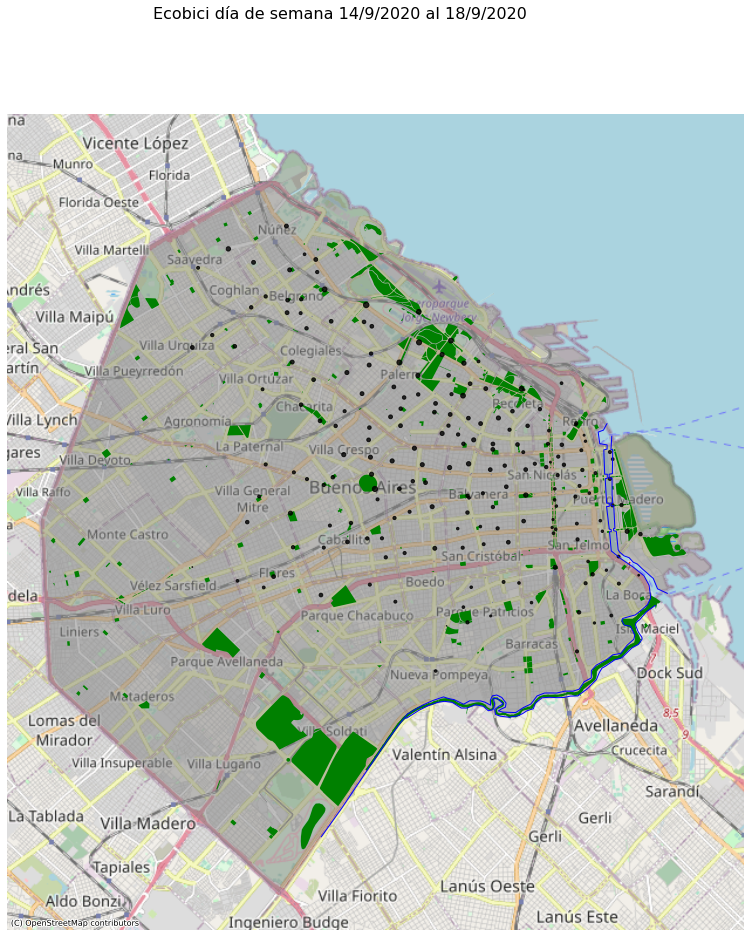

In [126]:
#dia de semana de 2020
#(24,9)
f, ax = plt.subplots(1,figsize=(40,15))
comunas.plot(linewidth=0.1, facecolor='grey', edgecolor='white', ax=ax, alpha = 0.5)
#agregamos al plot los rios y los parques
rios.plot(ax=ax, color='blue',linewidth=1)
parques.plot(ax=ax, color='green')
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.CH)
gdf_2020_dias_semana_group_estacion_merge.plot(ax = ax, marker='.', color='black', markersize = gdf_2020_dias_semana_group_estacion_merge['cant']**.7,alpha=0.8)
f.suptitle('Ecobici día de semana 14/9/2020 al 18/9/2020', fontsize=16)
ax.set_axis_off()

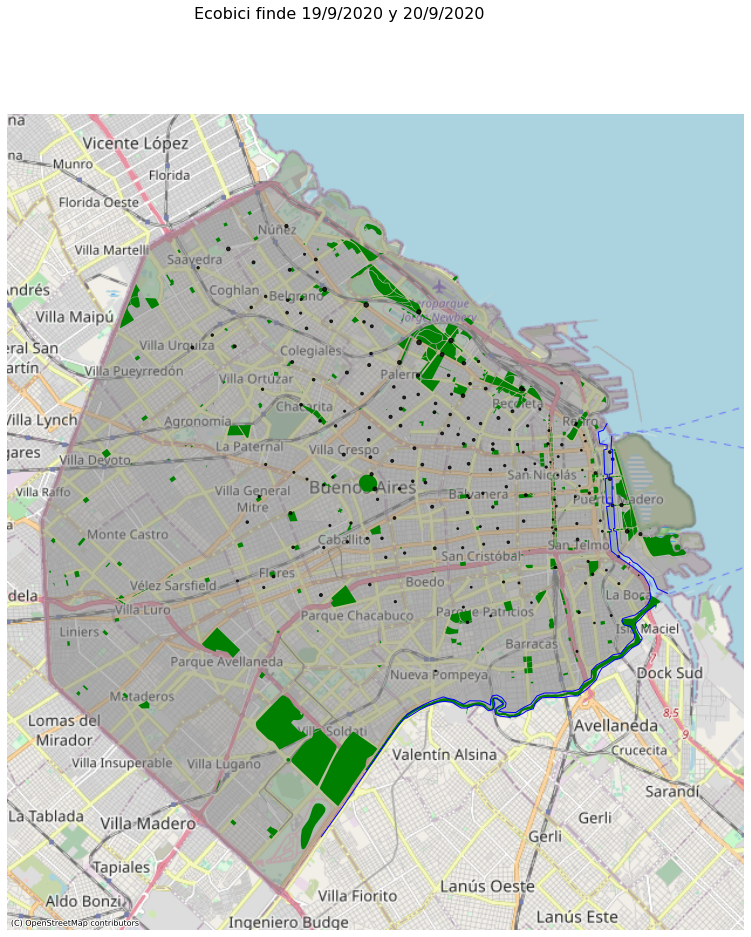

In [127]:
f, ax = plt.subplots(1,figsize=(40,15))
comunas.plot(linewidth=0.1, facecolor='grey', edgecolor='white', ax=ax, alpha = 0.5)
#agregamos al plot los rios y los parques
rios.plot(ax=ax, color='blue',linewidth=1)
parques.plot(ax=ax, color='green')
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.CH)
gdf_2020_finde_group_estacion_merge.plot(ax = ax, marker='.', color='black', markersize = gdf_2020_finde_group_estacion_merge['cant']**.7,alpha=0.8)
f.suptitle('Ecobici finde 19/9/2020 y 20/9/2020', fontsize=16)
ax.set_axis_off()

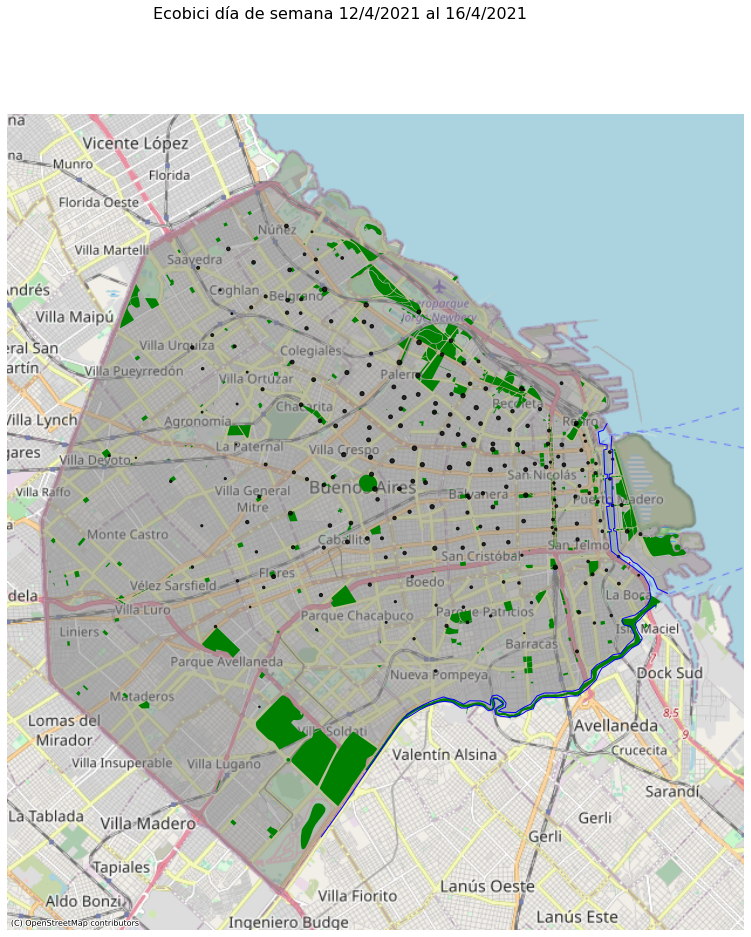

In [128]:
#dia de semana de 2021
f, ax = plt.subplots(1,figsize=(40,15))
comunas.plot(linewidth=0.1, facecolor='grey', edgecolor='white', ax=ax, alpha = 0.5)
#agregamos al plot los rios y los parques
rios.plot(ax=ax, color='blue',linewidth=1)
parques.plot(ax=ax, color='green')
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.CH)
gdf_2021_dias_semana_group_estacion_merge.plot(ax = ax, marker='.', color='black', markersize = gdf_2021_dias_semana_group_estacion_merge['cant']**.7,alpha=0.8)
f.suptitle('Ecobici día de semana 12/4/2021 al 16/4/2021', fontsize=16)
ax.set_axis_off()

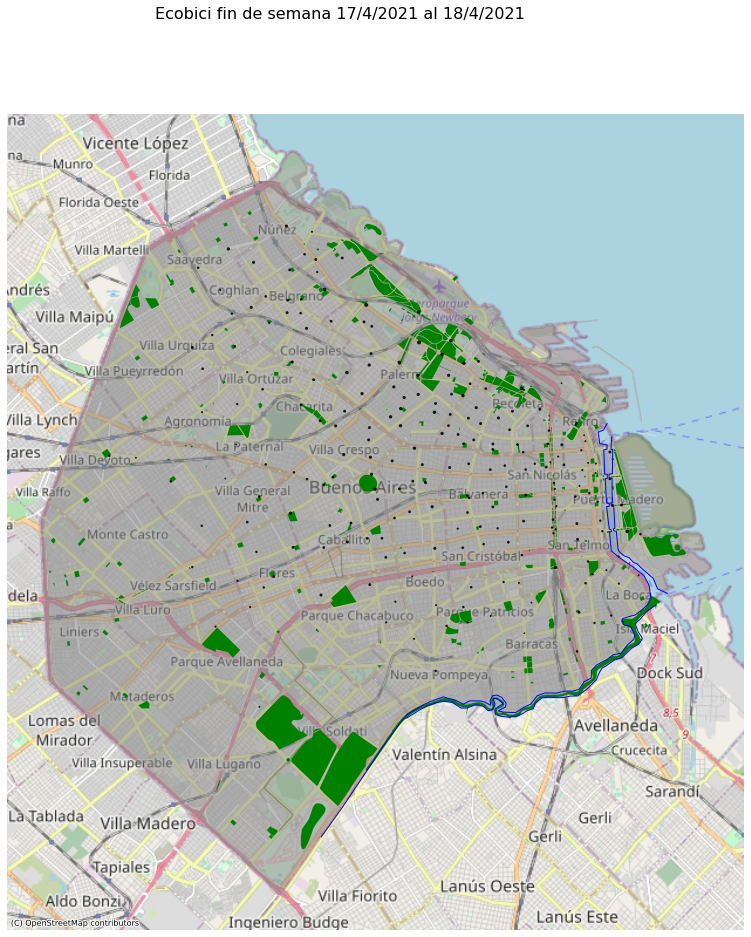

In [129]:
#facecolor='grey', edgecolor='white'
f, ax = plt.subplots(1,figsize=(40,15))
comunas.plot(linewidth=0.1, facecolor='grey', edgecolor='white', ax=ax, alpha = 0.5)
#agregamos al plot los rios y los parques
rios.plot(ax=ax, color='blue',linewidth=1)
parques.plot(ax=ax, color='green')
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.CH)
gdf_2021_finde_group_estacion_merge.plot(ax = ax, marker='.', color='black', markersize = gdf_2021_finde_group_estacion_merge['cant']**.7,alpha=0.8)
f.suptitle('Ecobici fin de semana 17/4/2021 al 18/4/2021', fontsize=16)
ax.set_axis_off()

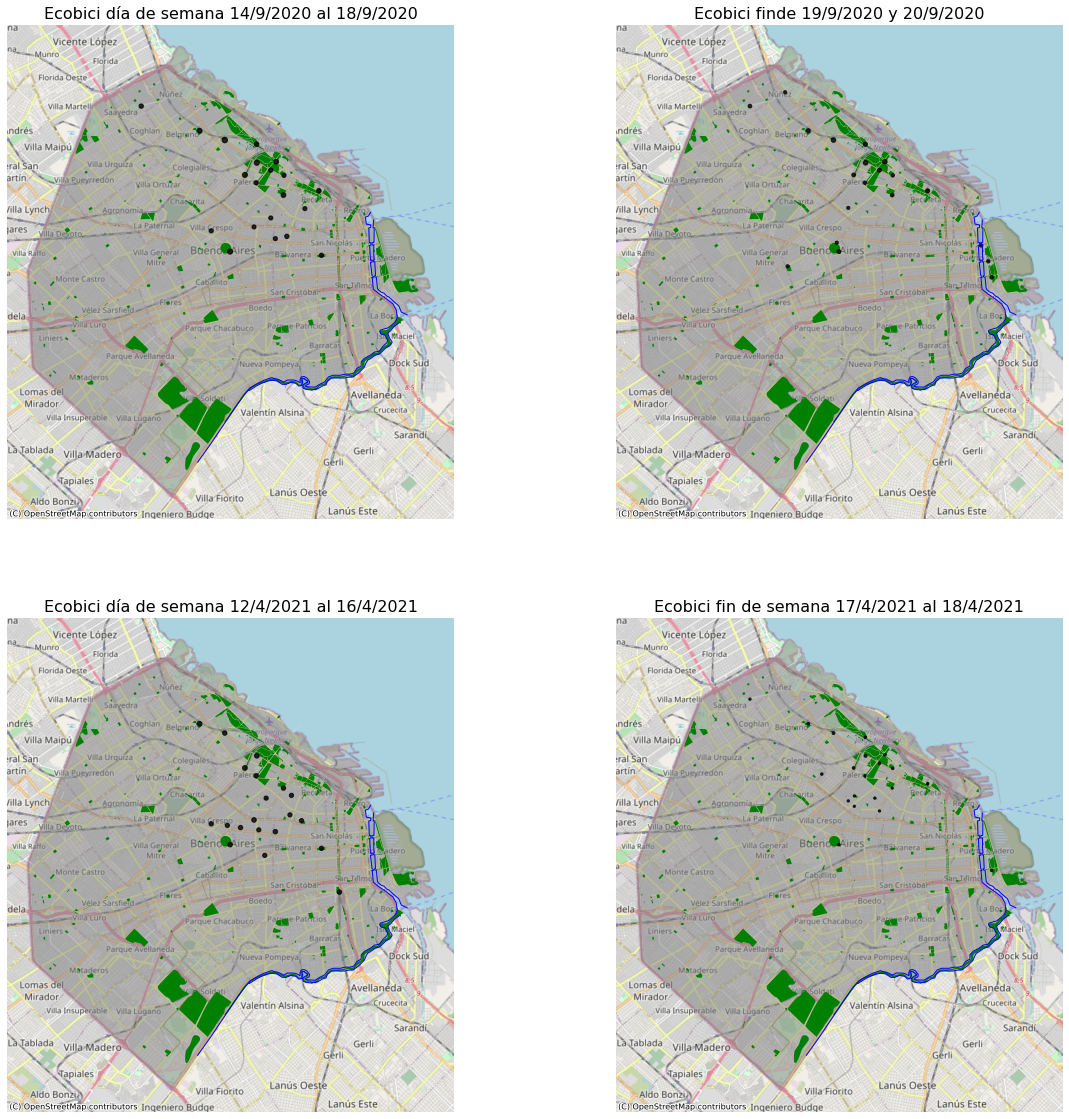

In [130]:
# en dos filas y dos columnas, con mas posiciones
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


#dia de semana de 2020
#primer imagen
comunas.plot(linewidth=0.1, facecolor='grey', edgecolor='white', ax=ax1, alpha = 0.5)
#agregamos al plot los rios y los parques
rios.plot(ax=ax1, color='blue',linewidth=1)
parques.plot(ax=ax1, color='green')
ctx.add_basemap(ax=ax1, source=ctx.providers.OpenStreetMap.CH)
gdf_2020_dias_semana_group_estacion_merge.iloc[:20].plot(ax = ax1, marker='.', color='black', markersize = gdf_2020_dias_semana_group_estacion_merge['cant']**.7,alpha=0.8)
ax1.set_title('Ecobici día de semana 14/9/2020 al 18/9/2020', fontsize=16)
ax1.set_axis_off()

#fin de semana de 2020
#segunda imagen
comunas.plot(linewidth=0.1, facecolor='grey', edgecolor='white', ax=ax2, alpha = 0.5)
#agregamos al plot los rios y los parques
rios.plot(ax=ax2, color='blue',linewidth=1)
parques.plot(ax=ax2, color='green')
ctx.add_basemap(ax=ax2, source=ctx.providers.OpenStreetMap.CH)
gdf_2020_finde_group_estacion_merge.iloc[:20].plot(ax = ax2, marker='.', color='black', markersize = gdf_2020_finde_group_estacion_merge['cant']**.7,alpha=0.8)
ax2.set_title('Ecobici finde 19/9/2020 y 20/9/2020', fontsize=16)
ax2.set_axis_off()


#dia de semana de 2021
#tercera imagen
comunas.plot(linewidth=0.1, facecolor='grey', edgecolor='white', ax=ax3, alpha = 0.5)
#agregamos al plot los rios y los parques
rios.plot(ax=ax3, color='blue',linewidth=1)
parques.plot(ax=ax3, color='green')
ctx.add_basemap(ax=ax3, source=ctx.providers.OpenStreetMap.CH)
gdf_2021_dias_semana_group_estacion_merge.iloc[:20].plot(ax = ax3, marker='.', color='black', markersize = gdf_2021_dias_semana_group_estacion_merge['cant']**.7,alpha=0.8)
ax3.set_title('Ecobici día de semana 12/4/2021 al 16/4/2021', fontsize=16)
ax3.set_axis_off()

#fin de semana de 2021
#cuarta imagen
comunas.plot(linewidth=0.1, facecolor='grey', edgecolor='white', ax=ax4, alpha = 0.5)
#agregamos al plot los rios y los parques
rios.plot(ax=ax4, color='blue',linewidth=1)
parques.plot(ax=ax4, color='green')
ctx.add_basemap(ax=ax4, source=ctx.providers.OpenStreetMap.CH)
gdf_2021_finde_group_estacion_merge.iloc[:20].plot(ax = ax4, marker='.', color='black', markersize = gdf_2021_finde_group_estacion_merge['cant']**.7,alpha=0.8)
ax4.set_title('Ecobici fin de semana 17/4/2021 al 18/4/2021', fontsize=16)
ax4.set_axis_off()


plt.savefig("image_mapas.png")

Para comparar se tomaron las 20 estaciones con más viajes en cada uno de los casos (dia de semana septiembre, fin de semana septiembre, dia de semana abril, fin de semana abril).

Si bien no se ve un patrón muy claro. Se alcanza a ver que:
. Fin de semana de Abril los viajes disminuyeron en forma general y suelen ser más cerca de espacios verdes
. En las dos semanas analizadas se puede observar que para los fines de semana suele haber una preponderancia de los viajes orginados en espacios verdes. Pero en día de semana se ve que se suman otras estaciones que no parecieran relacionadas a espacios verdes.